# Задача о возможном повышении сотрудника 
## 0. Описание задачи

В данном датасете содержатся данные о наемных работниках.
Некоторое колличество человек каждый год получают продвижение по службе (примерно 5%). Задача заключается в определении достоин ли сотрудник получить повышение или нет на основе доступных данных.

Столбцы:  
* employee_id - идентификатор работника
* department - наименование департамента, куда рассматривалась кандидатура потенциального сотрудника
* region - наименование (обезличенное) региона, откуда поступила кандидатура;
* education - образование кандидиата (бакалавр, магистр, и т.д.);
* gender - пол (муж/жен) кандидата;
* recruitment_channel - канал подбора персонала;
* no_of_trainings - количество пройденных курсов
* age - возраст
* previous_year rating - рейтинг сотрудника за прошлый год
* length_of_service - стаж 
* KPIs_met > 80 % - ключевые показатели эффективности выше 80 % ?
* awards_won ? - является ли победитель номинаций/конкурсов
* avg_training_score - средний балл по пройденным курсам
* is_promoted - было ли повышение

## 1. Чтение данных

In [66]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения


data = pd.read_csv('train.csv', sep = ',', engine = 'python')
display(data)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [67]:
print("Размер датафрейма:")
shape = data.shape
print(shape)

Размер датафрейма:
(54808, 14)


## 2. Вычисление основных характеристик, визуализация

In [68]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [69]:
print("Кореляционная матрица")
corr_mat = data.corr()
corr_mat

Кореляционная матрица


,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004533,0.001274,-0.002501,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.063126,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.006008,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004533,-0.063126,0.006008,1.000000,0.000253,0.351578,0.027738,0.075139,0.159320
length_of_service,0.001274,-0.057275,0.657111,0.000253,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.002501,-0.045576,-0.025592,0.351578,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,0.008420,-0.007628,-0.008169,0.027738,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,-0.000586,0.042517,-0.048380,0.075139,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.159320,-0.010670,0.221582,0.195871,0.181147,1.000000


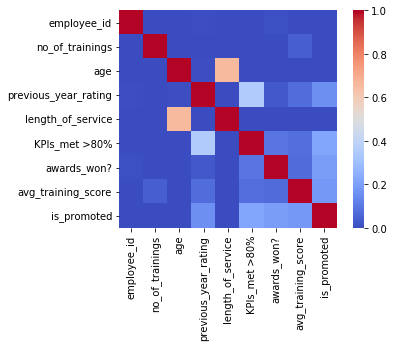

In [70]:
sns.heatmap(corr_mat, square=True, vmin=0, vmax=1, cmap='coolwarm')
pass

### Интерпретация результатов
Из результатов можно видеть, что age корелирует с length_of_service, прямая зависимость.  
Также можно видеть зависимость между KPIs_met >80% и previous_year_rating.  
Наиболее значимые признаки для повышения - previous_year_rating, KPIs_met >80%, awards_won? и avg_training_score

## 3. Обработка пропущенных значений

In [71]:
na_series = data.isna().sum()
print(f"Наличие NaN в столбцах: \n{na_series}")
na_total_count = na_series.values.sum()
print(f"Всего пропущенных значений в датафрейме: {na_total_count}, {100*na_total_count/shape[0]:.2f}%")

Наличие NaN в столбцах: 
employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64
Всего пропущенных значений в датафрейме: 6533, 11.92%


## 10. Несбалансированность классов

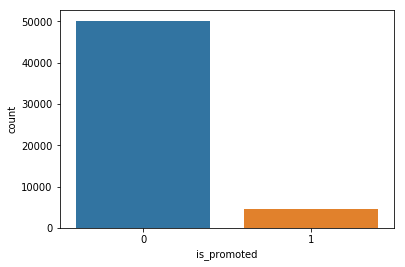

In [72]:
is_promoted_counts = data["is_promoted"].value_counts()
sns.countplot(x="is_promoted", order=is_promoted_counts.index, data=data)
pass

In [73]:
is_promoted_values = is_promoted_counts.values
print(f"Несбалансированность классов {100*is_promoted_values[0]/shape[0]:.1f}:{100*is_promoted_values[1]/shape[0]:.1f}")

Несбалансированность классов 91.5:8.5
